In [1]:
import numpy as np
import pandas as pd
import csv
import torch
from models.DGDNN.Train_Eval.utils import theta_regularizer, neighbor_distance_regularizer
import torch.nn.functional as F

#Visualize and create graph/charts
import networkx as nx
import matplotlib.pyplot as plt

#Path managment
import os
import sys

from IPython.display import clear_output
torch.__version__

'2.2.2'

### Add the DGDNN libraries into the path to get Data

In [2]:
model_path = os.path.abspath('/Users/mirco/Documents/Tesi/code/models/DGDNN/Model')
if model_path not in sys.path:
    sys.path.insert(0, model_path)
data_path = os.path.abspath('/Users/mirco/Documents/Tesi/code/models/DGDNN/Data')
if data_path not in sys.path:
    sys.path.insert(0, data_path)
    

# The dataset 

In [3]:
from geometric_dataset_gen import MyDataset as MyGeometricDataset
from dataset_gen import MyDataset 

In [4]:
# # Configure the default variables // # these can be tuned // # examples
sedate = ['2013-01-01', '2014-12-31']  # these can be tuned
val_sedate = ['2015-01-01', '2015-06-30'] # these can be tuned
test_sedate = ['2015-07-01', '2017-12-31'] # these can be tuned
market = ['NASDAQ', 'NYSE', 'SSE'] # can be changed
dataset_type = ['Train', 'Validation', 'Test']

com_path = ['/Users/mirco/Documents/Tesi/code/data/datasets/NASDAQ.csv',
            '/Users/mirco/Documents/Tesi/code/data/datasets/NYSE.csv',
            '/Users/mirco/Documents/Tesi/code/data/datasets/NYSE_missing.csv'
            ] # Where the company tickers are

des = "/Users/mirco/Documents/Tesi/code/data/datasets/graph_snapshots/" # Where to save the processed graphs

# directory = "/Users/mirco/Documents/Tesi/code/data/datasets/America_Stocks" 
# window = 19
# NASDAQ_com_list = []
# NYSE_com_list = []
# NYSE_missing_list = []
# com_list = [NASDAQ_com_list, NYSE_com_list, NYSE_missing_list] #Ticker lists

# for idx, path in enumerate(com_path): #Per each ticker folder get the path and index
#     with open(path) as f:
#         file = csv.reader(f)
#         for line in file:
#             com_list[idx].append(line[0])  # append first element of line if each line is a list
# NYSE_com_list = [com for com in NYSE_com_list if com not in NYSE_missing_list] #Filter the com on NYSE since they are missing 
# fast_approx = False # True for fast approximation and implementation
# # Generate datasets

# # Market: 0:Nasdaq 1:NYSE 2:SSE
# # root: str, desti: str, market: str, comlist: List[str], start: str, end: str, window: int, dataset_type: str, fast_approx
# print("-"*5, "Building train dataset..." , "-"*5)
# #Market: 0:Nasdaq 1:NYSE 2:SSE
#  #                      root: str, desti: str, market: str, comlist: List[str], start: str, end: str, window: int, dataset_type: str, fast_approx
# train_dataset = MyGeometricDataset(directory, des, market[0], NASDAQ_com_list, sedate[0], sedate[1], window, dataset_type[0], fast_approx) 
# print("-"*5, "Building validation dataset..." , "-"*5)
# validation_dataset = MyGeometricDataset(directory, des, market[0], NASDAQ_com_list, val_sedate[0], val_sedate[1], window, dataset_type[1], fast_approx)
# print("-"*5, "Building test dataset..." , "-"*5)
# test_dataset = MyGeometricDataset(directory, des, market[0], NASDAQ_com_list, test_sedate[0], test_sedate[1], window, dataset_type[2], fast_approx)

In [5]:
# To reload modulse if needed
%reload_ext autoreload
%autoreload 2

In [6]:
dir = 'data/datasets/America_Stocks_reduced'
dest = 'data/datasets/graph/'
market = 'NASDAQ'
company_list = ['AAPL', 'ACWI',
'ADSK',
'ADTN',
'ADUS',
'AEGN']

train_sedate = ['2016-05-01', '2017-06-30']  # these can be tuned
val_sedate = ['2017-07-01', '2017-12-31'] # these can be tuned
test_sedate = ['2018-01-01', '2019-12-31'] # these can be tuned
dataset_type = ['Train', 'Validation', 'Test']
window_size = 2  # 30 days window
dataset_label = 'train'
use_fast_approximation = False

# Create a dataset instance
# dataset = MyGeometricDataset(
#     root=dir,
#     desti=dest,
#     market=market,
#     comlist=company_list,
#     start=start_date,
#     end=end_date,
#     window=window_size,
#     dataset_type=dataset_label,
#     fast_approx=use_fast_approximation
# )
print("-"*5, "Building train dataset..." , "-"*5)
train_dataset = MyGeometricDataset(dir, dest, market, company_list, train_sedate[0], train_sedate[1], window_size, dataset_type[0], use_fast_approximation) 
print("-"*5, "Building validation dataset..." , "-"*5)
#validation_dataset = MyGeometricDataset(dir, dest, market, company_list, val_sedate[0], val_sedate[1], window_size, dataset_type[1], use_fast_approximation)
print("-"*5, "Building test dataset..." , "-"*5)
#test_dataset = MyGeometricDataset(dir, dest, market, company_list, test_sedate[0], test_sedate[1], window_size, dataset_type[2], use_fast_approximation)
clear_output()


In [7]:
print(f"Number of snapshots graph of the dataset: {len(train_dataset)}")
print(f"Graph snapshot structure: {train_dataset[0]}")
print(f"Number of nodes: {len(train_dataset[0].x)}")
print(f"Number of target labels: {len(train_dataset[0].y)}")

Number of snapshots graph of the dataset: 294
Graph snapshot structure: Data(x=[6, 10], edge_index=[2, 36], edge_attr=[36], y=[6])
Number of nodes: 6
Number of target labels: 6



Visualizing Graph...
Number of nodes: 6
Number of edges: 21
tensor([0, 0, 0, 0, 0, 1])


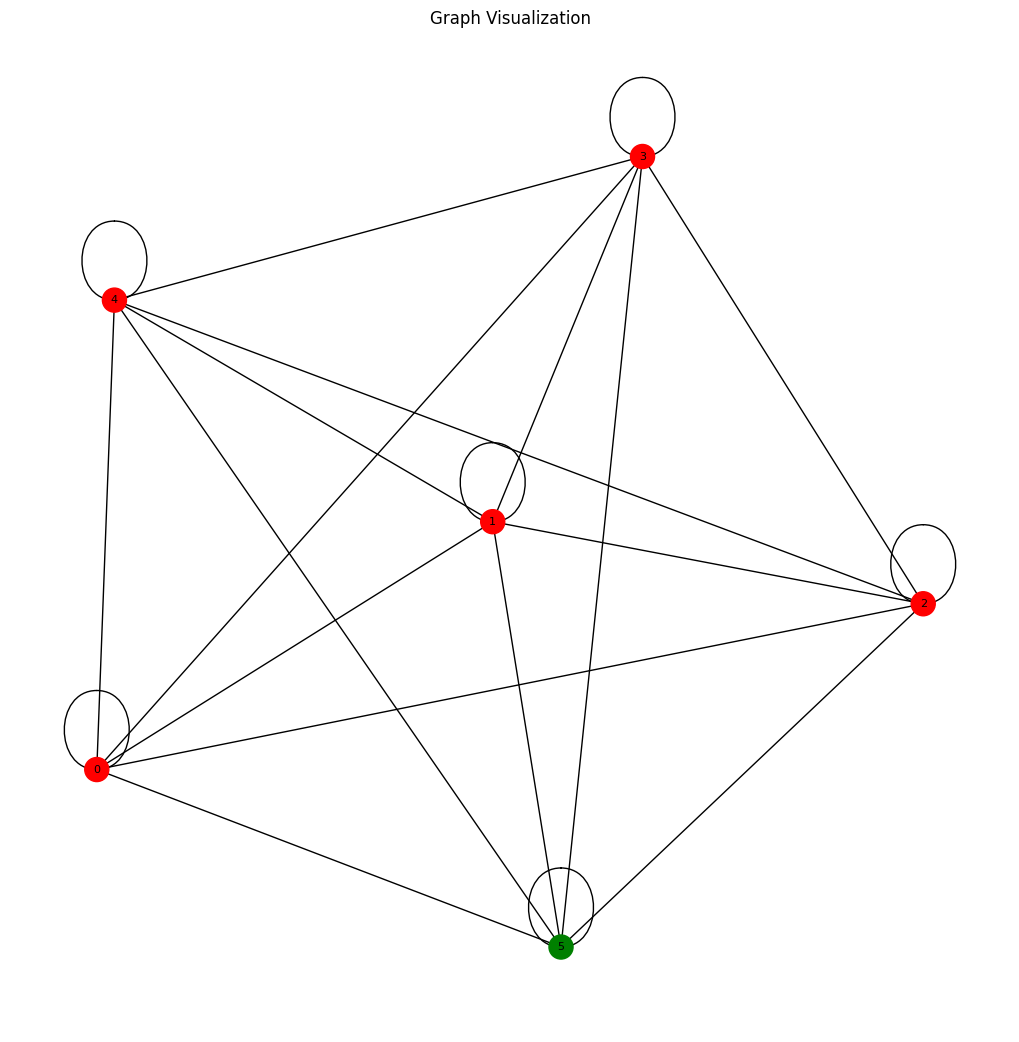

tensor([[ 4.5535,  4.5560,  4.5547,  4.5720,  4.5369,  4.5505,  4.5501,  4.5662,
         17.6812, 17.8504],
        [ 4.0611,  4.0514,  4.0637,  4.0542,  4.0577,  4.0471,  4.0632,  4.0490,
         14.3415, 14.7073],
        [ 4.1109,  4.1250,  4.1339,  4.1304,  4.1021,  4.1059,  4.1331,  4.1164,
         14.0920, 14.4017],
        [ 3.0155,  3.0175,  3.0263,  3.0175,  3.0048,  3.0022,  3.0209,  3.0047,
         12.8362, 12.5793],
        [ 2.9689,  2.9786,  3.0067,  2.9962,  2.9689,  2.9269,  2.9967,  2.9596,
         11.1221, 11.4673],
        [ 3.1019,  3.0901,  3.1166,  3.0901,  3.0915,  2.9783,  3.1113,  3.0062,
         11.6674, 12.7243]])

In [8]:
# --- Assume 'dataset' is your initialized MyGeometricDataset ---

def visualize_geometric_graph(data_sample):
    """
    Visualizes a single torch_geometric.data.Data graph sample.
    """
    # Create a NetworkX graph object
    G = nx.Graph()

    # The edge_index tensor is of shape [2, num_edges].
    # We need to transpose it and convert to a list of tuples.
    edge_list = data_sample.edge_index.t().tolist()

    # Add edges to the graph. Nodes are added automatically.
    G.add_edges_from(edge_list)

    print(f"\nVisualizing Graph...")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")

    # Use the labels (Y tensor) to color the nodes
    # For example, class 0 is blue, class 1 is red
    colors = ['red' if label == 0 else 'green' for label in data_sample.y] 
    print(data_sample.y)
    # Draw the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_color=colors, node_size=300, font_size=8)
    plt.title("Graph Visualization")
    plt.show()

# Visualize the first graph in the dataset

visualize_geometric_graph(train_dataset[0])
train_dataset[0].x


# Model 1: GConvGRU

In [9]:
from torch_geometric_temporal.nn import GConvGRU

/Users/mirco/Documents/Tesi/code/tesi_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Model 2: DGDNN

GitHub: https://github.com/pixelhero98/DGDNN

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader # For batching graph data
from torch_geometric.utils import to_dense_adj
from dgdnn import DGDNN 

In [11]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

## Define the model

In [54]:
####  Define model
layers = 6
num_nodes = 6 
expansion_step = 7
num_heads = 2
active_layers = [True, False, False, False, False, False]
timestamp = 2  #window
classes = 1
diffusion_size = [5*timestamp, 31*timestamp, 28*timestamp, 24*timestamp, 20*timestamp, 16*timestamp, 12*timestamp]
emb_size = [5 + 31, 64, 28 + 64, 50,
            24 + 50, 38, 20 + 38, 24,
            16 + 24, 12, 12+12, 10]  


model = DGDNN(
    diffusion_size=diffusion_size,
    embedding_size=emb_size,
    classes=1,
    layers=layers,
    num_nodes=num_nodes,
    expansion_step=expansion_step,
    num_heads=num_heads,
    active=active_layers,
    timestamp=timestamp
)

In [55]:
for idx, k in enumerate(model.state_dict().keys()):
    print(f"{list(model.state_dict().keys())[idx]}:  {model.state_dict()[k].shape}")

T:  torch.Size([6, 7, 6, 6])
theta:  torch.Size([6, 7])
diffusion_layers.0.fc.weight:  torch.Size([62, 10])
diffusion_layers.0.fc.bias:  torch.Size([62])
diffusion_layers.0.activation0.weight:  torch.Size([1])
diffusion_layers.1.fc.weight:  torch.Size([56, 62])
diffusion_layers.1.fc.bias:  torch.Size([56])
diffusion_layers.1.activation0.weight:  torch.Size([1])
diffusion_layers.2.fc.weight:  torch.Size([48, 56])
diffusion_layers.2.fc.bias:  torch.Size([48])
diffusion_layers.2.activation0.weight:  torch.Size([1])
diffusion_layers.3.fc.weight:  torch.Size([40, 48])
diffusion_layers.3.fc.bias:  torch.Size([40])
diffusion_layers.3.activation0.weight:  torch.Size([1])
diffusion_layers.4.fc.weight:  torch.Size([32, 40])
diffusion_layers.4.fc.bias:  torch.Size([32])
diffusion_layers.4.activation0.weight:  torch.Size([1])
diffusion_layers.5.fc.weight:  torch.Size([24, 32])
diffusion_layers.5.fc.bias:  torch.Size([24])
diffusion_layers.5.activation0.weight:  torch.Size([1])
cat_attn_layers.0.at

In [56]:
model.train()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1.5e-5)
criterion = nn.BCEWithLogitsLoss() # For binary classification (output is a single logit)

# Define training process & validation process & testing process
epochs = 2
#model.reset_parameters()

# Training
for epoch in range(epochs):
    model.train()
    objective_total = 0
    correct = 0
    total = 0

    for sample in train_dataset: #Recommend to update every sample, full batch training can be time-consuming
        X = sample.x  # node feature tensor
        A = to_dense_adj(sample.edge_index, 
                         batch=sample.batch, # Important for correct batch processing if batch_size > 1
                         edge_attr=sample.edge_attr, 
                         max_num_nodes=num_nodes).squeeze(0) # Squeeze for batch_size=1
        C = sample.y.unsqueeze(dim=1).type(dtype=torch.float32)
        optimizer.zero_grad()
        out = model(X, A)
        #objective = F.cross_entropy(out, C) - 0.0029 * neighbor_distance_regularizer(model.theta) + theta_regularizer(model.theta)
        objective = criterion(out.type(torch.float32), sample.y.unsqueeze(dim=1).type(torch.float32))
        # to fast implement can omit the two regularization terms + theta_regularizer(model.theta) - 0.0029 * neighbor_distance_regularizer(model.theta)
        objective.backward()
        optimizer.step()
        objective_total += objective.item()

    # If performance progress of the model is required
        out = out.argmax(dim=1)
        correct += int((out == C).sum())
        total += C.shape[0]
        if epoch % 1 == 0:
          print(f"Epoch {epoch}: loss={objective_total:.4f}, acc={correct / total:.4f}")



Epoch 0: loss=0.7531, acc=5.0000
Epoch 0: loss=1.4106, acc=4.5000
Epoch 0: loss=2.3105, acc=3.3333
Epoch 0: loss=3.0335, acc=3.2500
Epoch 0: loss=3.9691, acc=2.6000
Epoch 0: loss=4.5597, acc=3.0000
Epoch 0: loss=5.1716, acc=3.2857
Epoch 0: loss=5.7871, acc=3.5000
Epoch 0: loss=6.6321, acc=3.1111
Epoch 0: loss=7.2064, acc=3.4000
Epoch 0: loss=7.9545, acc=3.2727
Epoch 0: loss=8.5334, acc=3.5000
Epoch 0: loss=9.3223, acc=3.3077
Epoch 0: loss=10.0259, acc=3.2857
Epoch 0: loss=10.8450, acc=3.0667
Epoch 0: loss=11.5752, acc=3.0000
Epoch 0: loss=12.2782, acc=3.0000
Epoch 0: loss=12.9960, acc=2.9444
Epoch 0: loss=13.6908, acc=2.9474
Epoch 0: loss=14.4114, acc=2.8500
Epoch 0: loss=15.0956, acc=2.9048
Epoch 0: loss=15.7939, acc=2.9091
Epoch 0: loss=16.4800, acc=2.7826
Epoch 0: loss=17.1661, acc=2.7500
Epoch 0: loss=17.8742, acc=2.8000
Epoch 0: loss=18.6114, acc=2.8846
Epoch 0: loss=19.3754, acc=3.0000
Epoch 0: loss=20.1362, acc=3.1071
Epoch 0: loss=20.8682, acc=3.1724
Epoch 0: loss=21.5621, acc=

RuntimeError: mat1 and mat2 shapes cannot be multiplied (6x5 and 10x62)

In [57]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss() # For binary classification (output is a single logit)
num_epochs = 10 # Example

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader: # data will be a Batch object, even with batch_size=1
        data = data.to(device)
        optimizer.zero_grad()

        # Extract node features
        # For batch_size=1, data.x is [num_nodes, node_features_dim]
        X = data.x 

      

        # Convert edge_index and edge_attr to a dense adjacency matrix
        # For batch_size=1, to_dense_adj returns [1, num_nodes, num_nodes]
        # Squeeze it to get [num_nodes, num_nodes] as expected by the model.
        A = to_dense_adj(data.edge_index, 
                         batch=data.batch, # Important for correct batch processing if batch_size > 1
                         edge_attr=data.edge_attr, 
                         max_num_nodes=num_nodes).squeeze(0) # Squeeze for batch_size=1
        C = data.y.unsqueeze(dim=1).type(dtype=torch.float32)
        # Forward pass
        # DGDNN expects X: [num_nodes, features], A: [num_nodes, num_nodes]
        outputs = model(X, A) # Output shape: [num_nodes, classes]

        # Calculate loss
        # data.y shape: [num_nodes]
        if classes == 1 : # BCEWithLogitsLoss expects float labels
             loss = criterion(outputs, C)
        else: # CrossEntropyLoss expects long labels
             loss = criterion(outputs, C)


        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(outputs.argmax(dim=1), C)
    outputs = outputs.argmax(dim=1)
    correct += int((outputs == C).sum())
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}, acc={correct / total:.4f}")
     

print("Training finished.")

tensor([0, 0, 0, 0, 0, 0]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])
Epoch 1/10, Average Loss: 0.7029, acc=2.8673
tensor([0, 0, 0, 0, 0, 0]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])
Epoch 2/10, Average Loss: 0.6958, acc=2.8844
tensor([0, 0, 0, 0, 0, 0]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])
Epoch 3/10, Average Loss: 0.6966, acc=2.9014
tensor([0, 0, 0, 0, 0, 0]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])
Epoch 4/10, Average Loss: 0.6957, acc=2.9048
tensor([0, 0, 0, 0, 0, 0]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])
Epoch 5/10, Average Loss: 0.6958, acc=2.9082
tensor([0, 0, 0, 0, 0, 0]) tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
Epoch 6/10, Average Loss: 0.6952, acc=2.9286
tensor([0, 0, 0, 0, 0, 0]) tensor([[0.],
        [1.],
   

In [48]:
outputs.argmax(1) == C.squeeze()

tensor([ True, False,  True,  True,  True,  True])

## Temp maybe usefull

In [ ]:
from torch_geometric_temporal.signal import DynamicGraphTemporalSignal #Handle dynamic temporal graph